In [1]:
from IPython.display  import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/yolov7

/content/drive/MyDrive/yolov7


In [ ]:
%pip install -qr requirements.txt

     |████████████████████████████████| 596 kB 29.3 MB/s 
     |████████████████████████████████| 750.6 MB 11 kB/s 
     |████████████████████████████████| 21.0 MB 1.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.11.0 which is incompatible.
torchaudio 0.12.0+cu113 requires torch==1.12.0, but you have torch 1.11.0 which is incompatible.


# **Inference**

In [ ]:
!python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source inference/images/wSEKlarNeX8.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='inference/images/wSEKlarNeX8.jpg', update=False, view_img=False, weights=['yolov7.pt'])
YOLOR 🚀 v0.1-43-g8b72ac7 torch 1.11.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
 The image with the result is saved in:

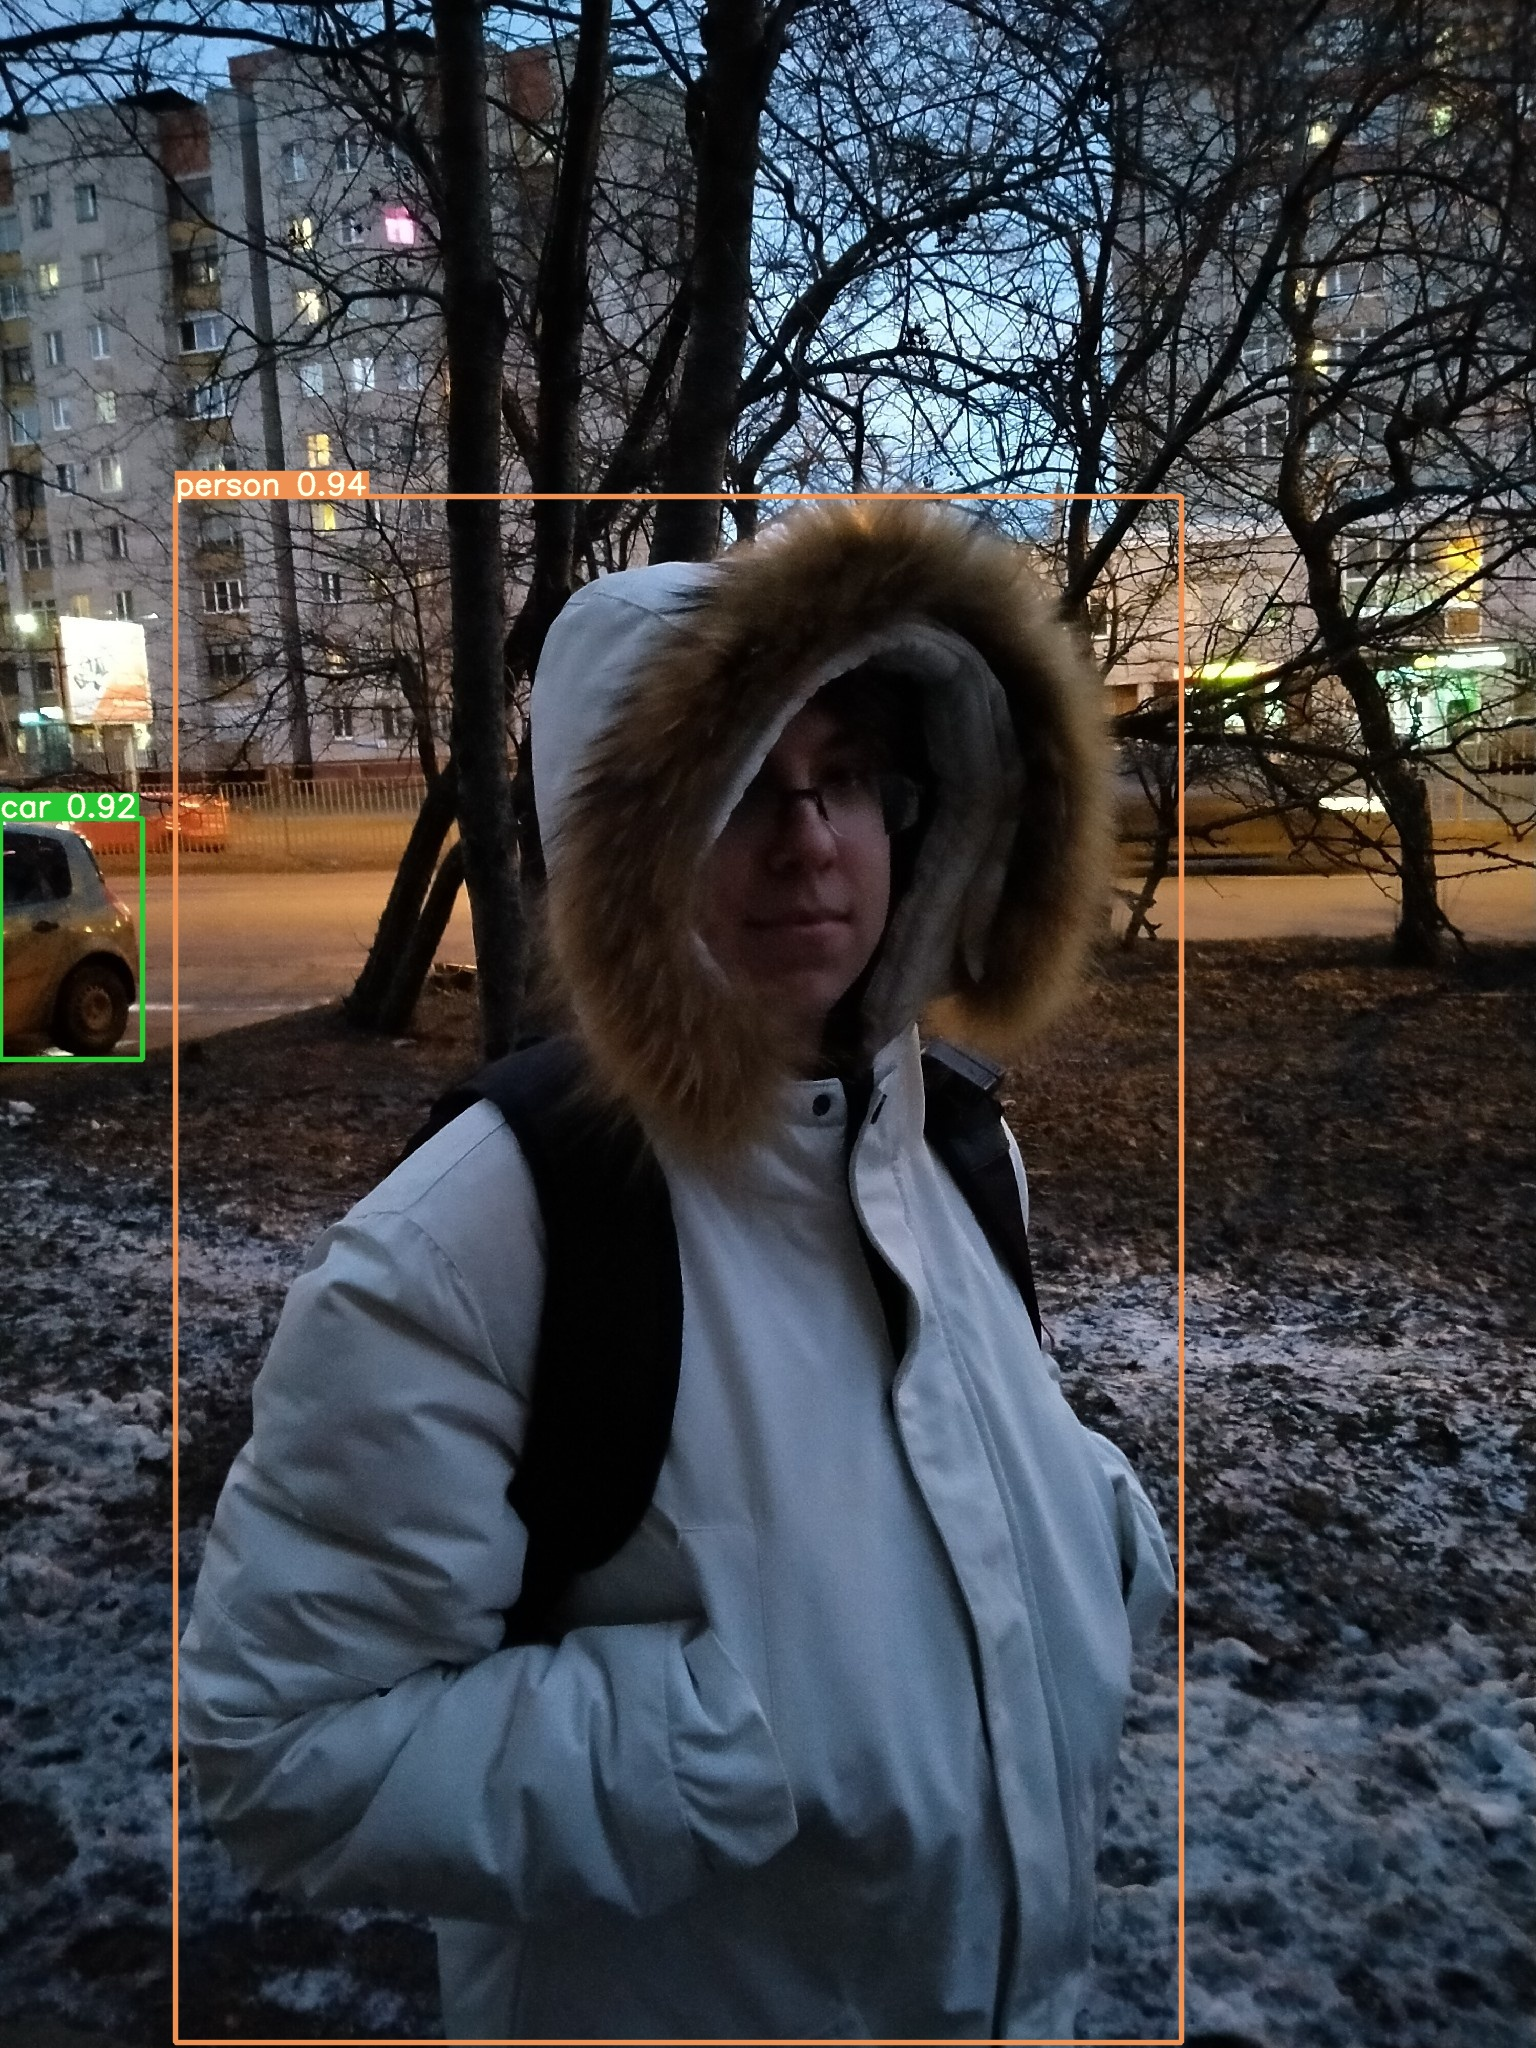

In [ ]:
Image("/content/drive/MyDrive/yolov7/runs/detect/exp8/wSEKlarNeX8.jpg")

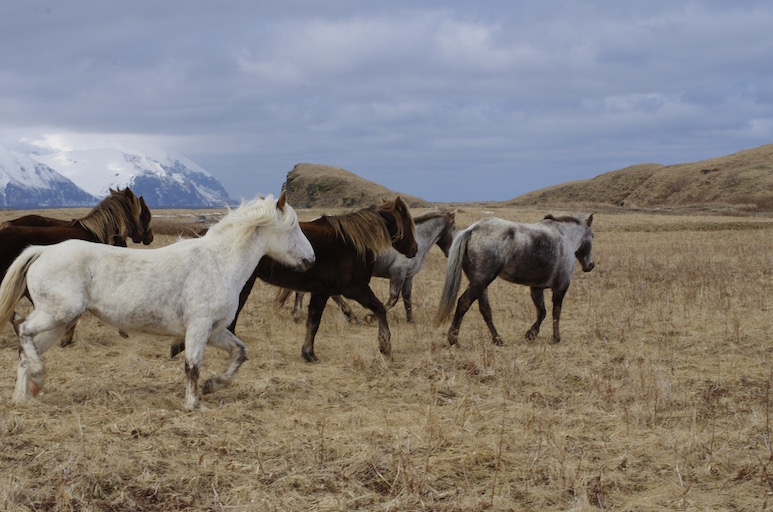

In [ ]:
Image("/content/drive/MyDrive/yolov7/inference/images/horses.jpg")

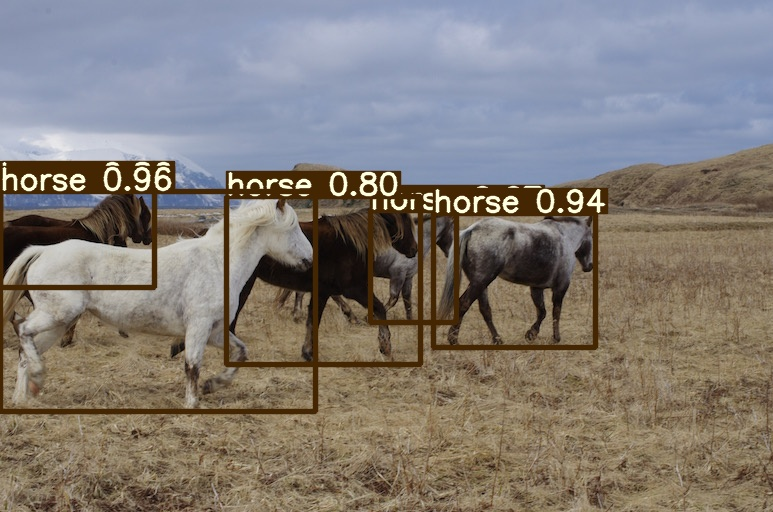

In [ ]:
Image("/content/drive/MyDrive/yolov7/runs/detect/exp/horses.jpg")

In [ ]:
!python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source /content/drive/MyDrive/yolov7/inference/images/wr-960.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/yolov7/inference/images/wr-960.jpg', update=False, view_img=False, weights=['yolov7.pt'])
YOLOR 🚀 v0.1-43-g8b72ac7 torch 1.12.0+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
 The image with the result is saved in: 

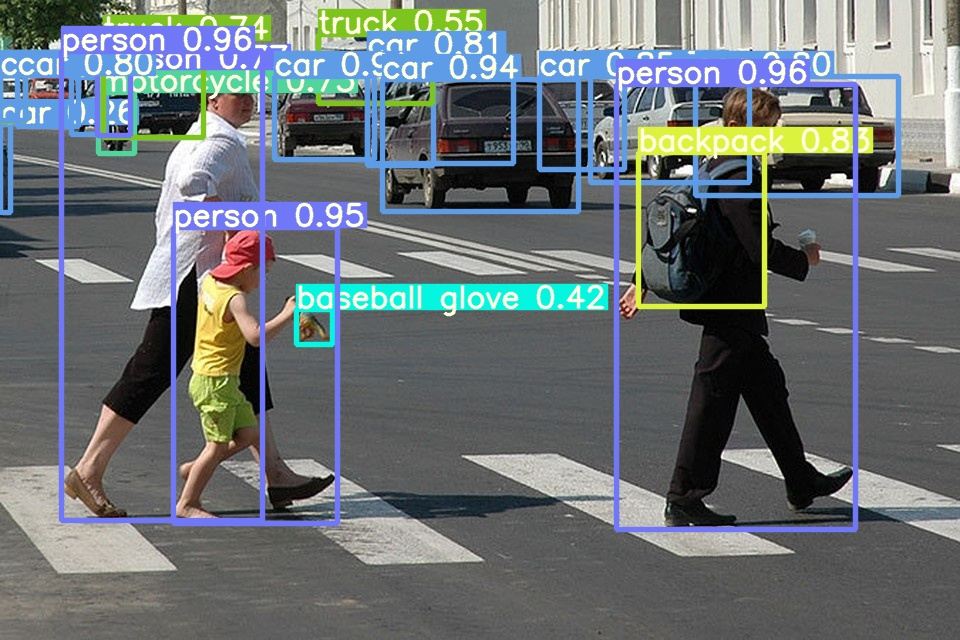

In [ ]:
Image("/content/drive/MyDrive/yolov7/runs/detect/exp3/wr-960.jpg")

In [ ]:
!python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source /content/drive/MyDrive/yolov7/inference/images/perexod.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/yolov7/inference/images/perexod.jpg', update=False, view_img=False, weights=['yolov7.pt'])
YOLOR 🚀 v0.1-43-g8b72ac7 torch 1.12.0+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
 The image with the result is saved in:

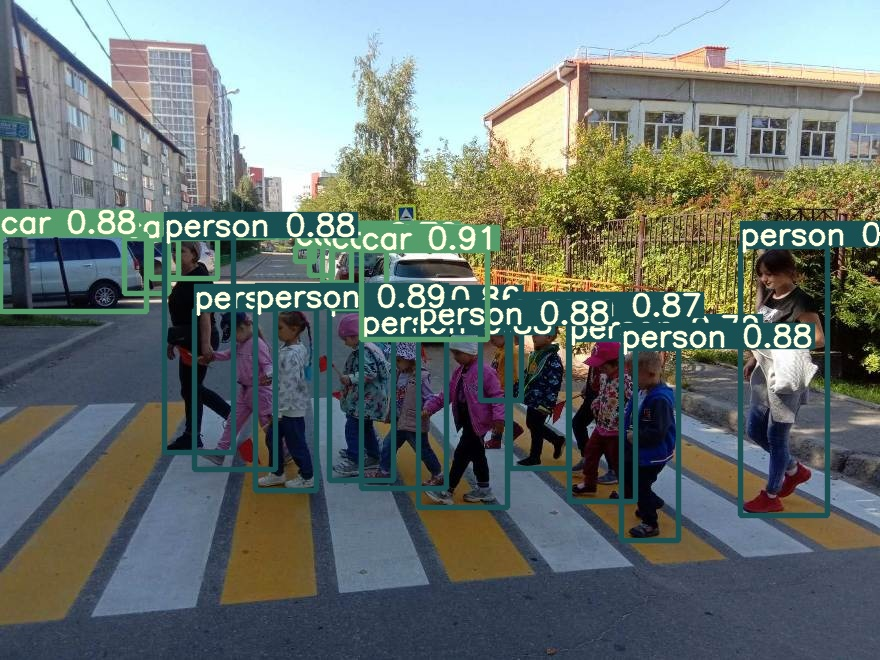

In [ ]:
Image("/content/drive/MyDrive/yolov7/runs/detect/exp6/perexod.jpg")

# Train

In [ ]:
!pip install GPUtil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=f004502473d4d1788c968413a056e1907687e41bd9dd3f928d9c9fc362988c01
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil


In [ ]:
from GPUtil import showUtilization as gpu_usage
import torch
from numba import cuda
 

In [ ]:
def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()  

Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 |  6% |  1% |


In [4]:
!python train.py --epochs 65 --workers 6 --device 0 --batch-size 16 --data /content/drive/MyDrive/Кружок_по_МО/Projects/DroneDetection/configs/custom_00_09_30_to_00_10_09.yaml --img 640 640 --cfg cfg/training/yolov7_custom.yaml --weights runs/train/yolov727/weights/best.pt --name yolov7 --hyp data/hyp.scratch.p5.yaml

Traceback (most recent call last):
  File "train.py", line 588, in <module>
    device = select_device(opt.device, batch_size=opt.batch_size)
  File "/content/drive/MyDrive/yolov7/utils/torch_utils.py", line 71, in select_device
    assert torch.cuda.is_available(), f'CUDA unavailable, invalid device {device} requested'  # check availability
AssertionError: CUDA unavailable, invalid device 0 requested


# Key points

In [ ]:
import matplotlib.pyplot as plt
import torch
import cv2
from torchvision import transforms
import numpy as np
from utils.datasets import letterbox
from utils.general import non_max_suppression_kpt
from utils.plots import output_to_keypoint, plot_skeleton_kpts

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weigths = torch.load('/content/drive/MyDrive/yolov7/key_points/yolov7-w6-pose.pt')
model = weigths['model']
model = model.half().to(device)
_ = model.eval()

In [ ]:
image = cv2.imread('/content/drive/MyDrive/yolov7/inference/images/perexod.jpg')
image = letterbox(image, 960, stride=64, auto=True)[0]
image_ = image.copy()
image = transforms.ToTensor()(image)
image = torch.tensor(np
.array([image.numpy()]))
image = image.to(device)
image = image.half()

output, _ = model(image)
# print(image)

In [ ]:
output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
output = output_to_keypoint(output)
nimg = image[0].permute(1, 2, 0) * 255
nimg = nimg.cpu().numpy().astype(np.uint8)
nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)
for idx in range(output.shape[0]):
    plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)

RuntimeError: ignored

In [ ]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(nimg)
plt.show()